Ce script démontre le gradient descent en minimisant une fonction de coût simple, puis en l'appliquant à une régression linéaire pour apprendre les paramètres optimaux w et b à partir de données fictives.

# 1. Descente de gradient sur une fonction de coût simple 
  J(a) = (a - 3)^2  (fonction convexe, minimum global en a = 3)


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def cost(a): # Fonction de coût J(a).
    return (a - 3) ** 2

def grad_cost(a): #Gradient de J(a) par rapport à a : J'(a) = 2(a - 3).
    return 2 * (a - 3)

# paramètres de la descente
learning_rate = 0.1   # taux d'apprentissage (η)
n_iterations = 20      # nombre d'itérations
a = 8.0                # point de départ (a0)

a_history = [a]
cost_history = [cost(a)]

#Calcul de la descente
for i in range(n_iterations):
    g = grad_cost(a)              # calcul du gradient en a
    a = a - learning_rate * g     # mise à jour : a_{t+1} = a_t - η * grad J
    a_history.append(a)
    cost_history.append(cost(a))

print("=== Descente de gradient 1D ===")
print(f"Valeur finale de a ≈ {a:.4f}")
print(f"Coût final J(a) ≈ {cost(a):.4f}")

=== Descente de gradient 1D ===
Valeur finale de a ≈ 3.0576
Coût final J(a) ≈ 0.0033


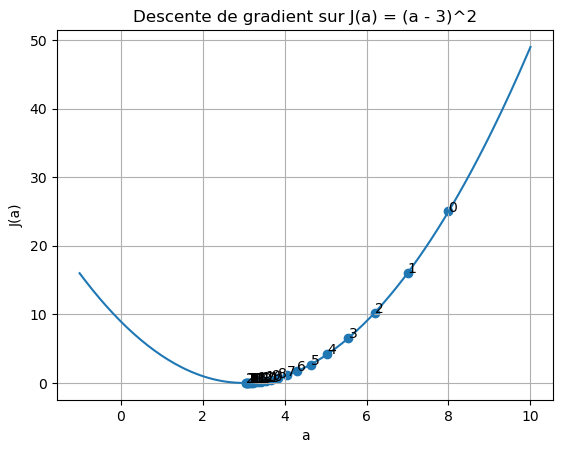

In [9]:
#Visualisation de la trajectoire sur la fonction de coût
a_vals = np.linspace(-1, 10, 200)
J_vals = cost(a_vals)

plt.figure()
plt.plot(a_vals, J_vals, label="J(a)")
plt.scatter(a_history, cost_history, marker='o')
for i, (ai, Ji) in enumerate(zip(a_history, cost_history)):
    plt.annotate(str(i), (ai, Ji))  # numéro d'itération
plt.title("Descente de gradient sur J(a) = (a - 3)^2")
plt.xlabel("a")
plt.ylabel("J(a)")
plt.grid(True)
plt.show()

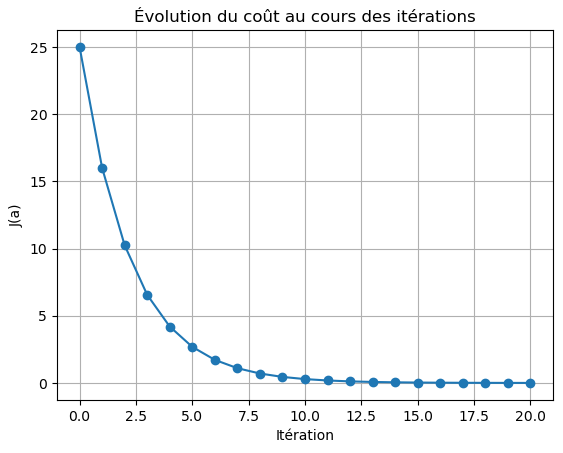

In [11]:
#Visualisation de la diminution du coût au cours des itérations 
plt.figure()
plt.plot(range(len(cost_history)), cost_history, marker='o')
plt.title("Évolution du coût au cours des itérations")
plt.xlabel("Itération")
plt.ylabel("J(a)")
plt.grid(True)
plt.show()

# 2. Descente de gradient pour une régression linéaire
Modèle : y_hat = w*x + b

Fonction de coût : MSE = 1/n * Σ (y_hat - y)^2

### Génération de données synthétiques (simule les "valeurs réelles")

In [31]:
np.random.seed(0)
n = 100
X = 2 * np.random.rand(n, 1)          # variable explicative
true_w = 4.0
true_b = 1.0
y = true_w * X + true_b + np.random.randn(n, 1) * 0.5  # cible avec bruit

### Exécution de l'algorithme de la descente du gradient


=== Régression linéaire par descente de gradient ===
w appris ≈ 3.9842 (vrai w = 4.0)
b appris ≈ 1.1111 (vrai b = 1.0)


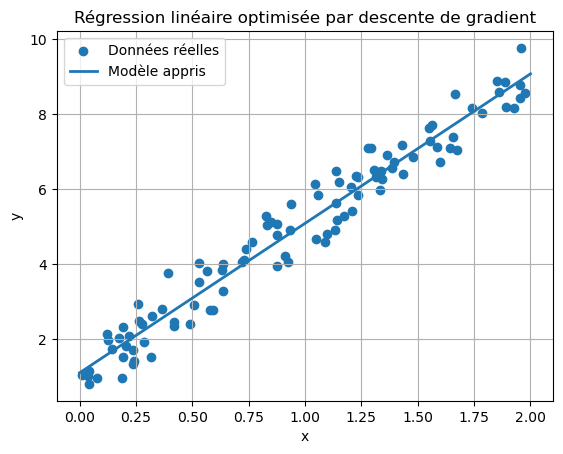

In [49]:
#Initialisation des paramètres du modèle
w = 0.0
b = 0.0
learning_rate = 0.1
n_iterations = 1000
mse_history = []
for i in range(n_iterations):
    
    y_hat = w * X + b #Prédictions du modèle
    
    errors = y_hat - y #Erreurs

    # Fonction de coût : MSE
    mse = (errors ** 2).mean()
    mse_history.append(mse)

    # Gradients de la MSE par rapport à w et b
    # dJ/dw = 2/n * Σ (y_hat - y) * x
    # dJ/db = 2/n * Σ (y_hat - y)
    dw = 2 * (errors * X).mean()
    db = 2 * errors.mean()

    # Mise à jour des paramètres (descente du gradient)
    w = w - learning_rate * dw
    b = b - learning_rate * db

print("\n=== Régression linéaire par descente de gradient ===")
print(f"w appris ≈ {w:.4f} (vrai w = {true_w})")
print(f"b appris ≈ {b:.4f} (vrai b = {true_b})")

#Visualisation des données et droite apprise
plt.figure()
plt.scatter(X, y, label="Données réelles")
x_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = w * x_line + b
plt.plot(x_line, y_line, label="Modèle appris", linewidth=2)
plt.title("Régression linéaire optimisée par descente de gradient")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



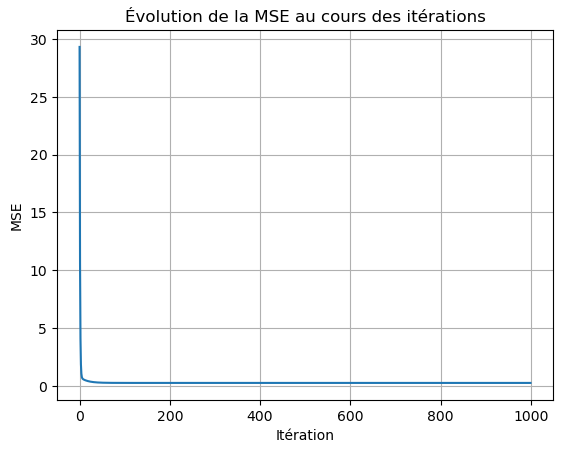

In [47]:
#Visualisation de la MSE au cours des itérations
plt.figure()
plt.plot(range(len(mse_history)), mse_history)
plt.title("Évolution de la MSE au cours des itérations")
plt.xlabel("Itération")
plt.ylabel("MSE")
plt.grid(True)
plt.show()